<a href="https://colab.research.google.com/github/fellypesb/calc-num/blob/main/metodos_iterativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calculando o de zero de funções com métodos iterativos**

Atividade desenvolvida durante as aulas de Cálculo Numérico, ministrada pela Prof. Dr. Helaine Cristina na Universidade Federal do Oeste do Pará (UFOPA).

**Aluno**: Fellype Siqueira Barroso


## **Análise gráfica**

Analisando o gráfico da função podemos identificar e isolar as raízes.  Isso pode falicitar a escolha dos valores de _chute_ inicial que precisam ser fornecidos aos métodos que serão apresentados a seguir

Utilizaremos a seguinte função:

$f(x) = x^3-9x+3$

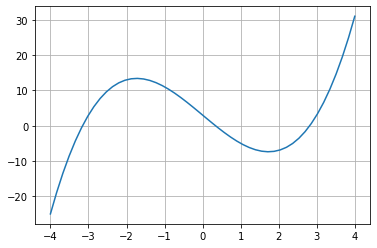

In [1]:
import numpy as np
import matplotlib.pyplot as plt

function = lambda x : x**3-9*x+3

x = np.linspace(-4,4)
plt.plot(x, function(x))
plt.grid()
plt.show()

Ao analisar o gráfico podemos identicar 3 raízes localizadas nos intervalos:

- $[-4, -3]$  
- $[0, 1]$ 
- $[2, 3]$   



### **Método da bisseção**
Para esse método é necessário que seja fornecido um intervalo $[a, b]$ no qual se encontra a raiz que queremos encontrar. Neste caso, utilizaremos os intervalos já conhecidos que foram obtidos ao analisarmos o gráfico da função. Importante ressaltar que a aproximação so é possível caso o seguinte critério seja satisfeito:

> $f(a) f(b) > 0$

---

Este método caminha para a convergência de acordo com o seguinte processo iterativo:



> $x = \dfrac{a + b}{2}$



In [2]:
# Implementação do método da Bissecção

def bisseccao(a, b, f, tol=1e-8, maxiter=20, verbose=False):
    '''
        Função que calcula o zero de uma função com o método da Bissecção.
        
        Parametros
        --------------
        a: float
            Extremo esquerdo do intervalo de inspeção [a,b].
            
        b: float
            Extremo direito do intervalo de inspeção [a,b].
            
        f: lambda
            Função a qual queremos encontrar suas raízes.
        
        tol: float, default=1e-8
            Tolerancia para critério de parada.
          
        maxiter: int, default=20
            Quantidade máxima de iterações desejadas.
        
        verbose: bool, default=False
            True, Caso queira visualizar o progresso das iterações.
            
        Saída
        -----------
        Quantidade de iterações necessária para convergência
        e valor x, tal que f(x) é aprox. 0.
    '''
    
    if f(a)*f(b) > 0:
        raise ValueError("Não há raiz no intervalo fornecido")
        
    iter_ = 0
    
    while(iter_ <= maxiter and abs(b - a) > tol):
        x = (a + b)/2      

        f_a = f(a)
        f_b = f(b)
        f_x = f(x)

        if(f_a * f_x > 0):
            a = x
        else:
            b = x
            
        iter_ += 1
        if verbose:
            print(f'Iteração: {iter_} \t Aproximação: {x}')
    if iter_ > maxiter:
        print("Número máximo de iterações alcançado!")
    else:
        print(f'Iterações: {iter_} \t Raiz: {x}')
    
function = lambda x : x**3-9*x+3

bisseccao(a=-4, b=-3, f=function, tol=1e-8, maxiter=30)
bisseccao(a=0, b=1, f=function, tol=1e-8, maxiter=30)
bisseccao(a=2, b=3, f=function, tol=1e-8, maxiter=30)


Iterações: 27 	 Raiz: -3.1545230075716972
Iterações: 27 	 Raiz: 0.3376089558005333
Iterações: 27 	 Raiz: 2.8169140592217445


Ao fornecer os intervalos em que se encontram as raízes da função podemos observar, na célula de código acima, que o método da bissecção necessitou de 27 (vinte e sete) iterações para a convergência e retornou os seguintes valores:  
- $X_1 \approx -3.15452$  
- $X_2 \approx 0.33760$  
- $X_3 \approx 2.81691$



Para conferir a veracidade dos resultados podemos novamente analisar o gráfico da função, desta vez, fornecendo as raízes encontradas pelo método da bissecção.

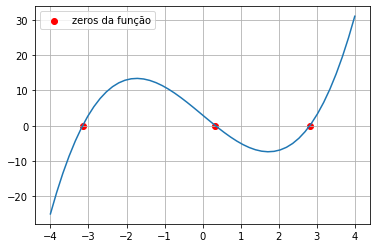

In [3]:
function = lambda x : x**3-9*x+3

x = np.linspace(-4,4)
plt.plot(x, function(x))
plt.scatter([-3.15452, 0.33760, 2.81691], [0,0,0], label='zeros da função', c='r')
plt.grid()
plt.legend()
plt.show()

# **Método do Ponto Fixo**

Para utilizarmos este método primeiro precisamos isolar a variável $x$ de $f(x)$ em que ressultará em uma $g(x)$. Essa função $g(x)$ que então será utilizada pelo processo iterativo do método para encontrar as raízes de função.

Considere a função: $f(x) = xe^x-1$

As possíveis $g(x)$ que podemos formar realizando manipulações algébricas são:



> $g_1(x) = \frac{1}{e^x}$  

> $g_2(x) = \frac{1+x}{1+e^x}$

> $g_3(x) = x + 1 - xe^x$





---



O processo iterativo desse método é realizado da seguinte forma:



> $x = g(x)$



In [4]:
# implementação do método do Ponto Fixo

def fixedpoint(x, g, tol=1e-8, maxiter=20, verbose=False):
    '''
        Função que calcula o zero de funções com o método do Ponto Fixo.
        
        Parâmetros
        --------------
        x: float
            chute inicial.
            
        g: lambda
            Função alcançada apartir de f(x).
            Ex: f(x) = xe^x-1; g(x) = 1/e^x
        
        tol: float, default=1e-8
            Tolerancia para critério de parada.
        
        maxiter: int, default=20
            Quantidade máxima de iterações desejadas.
        
        verbose: bool, default=False
            True, Caso queira visualizar o progresso das iterações.
            
        Saída
        -----------
        Quantidade de iterações necessária para convergência
        e valor x, tal que f(x) é aprox. 0.
    '''
    iter_ = 0 
    xi = x
    xj = x
    err = np.inf
    while( iter_ <= maxiter and abs(err) > tol):
        xi = g(xj)
        err = (xi-xj)
        xj = xi
        iter_ += 1
        if verbose:
            print(f'Iterações: {iter_} \t Aproximação: {xi}') 
    if iter_ > maxiter:
        print("Número máximo de iterações alcançado!")
    else:
        print(f'Iterações: {iter_} \t Raiz: {xi}') 

# f(x) = xe^x-1 
g1 = lambda x: 1/np.exp(x)             # Converge lentamente
g2 = lambda x: (1+x)/(1+np.exp(x))     # Converge rapidamente
g3 = lambda x: x + 1 - x*np.exp(x)     # Não converge

fixedpoint(0.5, g1, maxiter=30, tol=1e-8)
fixedpoint(0.5, g2, tol=1e-8)
fixedpoint(0.5, g3, tol=1e-8, maxiter=100)


Iterações: 30 	 Raiz: 0.5671432876111684
Iterações: 4 	 Raiz: 0.5671432904097838
Número máximo de iterações alcançado!


Utilizando um _chute_ inicial de $0.5$ e critério de tolerância $1.10^{-8}$ foi possível constatar, que, utilizando a $g_2(x)$ o método converge rapidamente, isto é com a menor quantidade de iterações necessária. Já quando utilizamos a $g_1(x)$ a convergência acontece de forma mais lenta, necessitando de $30$ iterações. Um caso excepcional ocorreu com a $g_3(x)$ que mesmo configurando um número extremante grande de iterações o método não chegou a convergir para $x^*$ 

## **Método de Newton**

Para este método, além de fornecermos a função que queremos encontras as raízes precisamos támbem, fornecer a sua derivada. Pois, esse método converge para $x^*$ a partir de múltiplas retas tangentes traçadas ao longo da função.

Utilizaremos a mesma função testada com o método da bisseccção que foi.    


> $f(x) = x^3 - 9x + 3$



Calculando a sua derivada obteve-se:  
> $f'(x) = 2x^2 - 9$




---


O processo iterativo desse método é realizado da seguinte forma:  


> $x = x - \frac{f(x)}{f'(x)}$



In [5]:
# Implementação do método de Newton
def newton(x, f, df, tol=1e-8, maxiter=20, verbose=False):
    '''
        Função que calcula o zero de funções com o método de Newton.
        
        Parametros
        --------------
        x: float
            chute inicial.
            
        f: lambda
            Função a qual queremos encontrar suas raízes
        
        df: lambda
            Derivada da função f
        
        tol: float, default=1e-8
            Tolerancia para critério de parada.
        
        maxiter: int, default=20
            Quantidade máxima de iterações desejadas.
        
        verbose: bool, default=False
            True, Caso queira visualizar o progresso das iterações.
            
        Saída
        -----------
        Quantidade de iterações necessária para convergência
        e valor x, tal que f(x) é aprox. 0
    '''
    iter_ = 0 
    while( iter_ <= maxiter and abs(f(x)) > tol):

        x = x - (f(x)/df(x)) 
        iter_ += 1
        if verbose:
             print(f'Iterações: {iter_} \t Aproximação: {x}') 
    if iter_ > maxiter:
        print("Número máximo de iterações alcançado!")
    else:
        print(f'Iterações: {iter_} \t Raiz: {x}')       

f = lambda x: x**3-9*x+3
df = lambda x:3*x**2-9

newton(0.5, f, df, tol=1e-8)

Iterações: 3 	 Raiz: 0.3376089559653128


Utilizando um chute inicial de $0.5$ e tolerância de erro $1.10^{-8}$ o método de Newton foi capaz de convergir em apenas 3 (três) iterações. Convergência muita rápida se comparado com o método da Bisseccção que necessitou de 27 (vinte e sete) iterações para realizar a mesma convergência.

## **Método da Secante**

O método da secante pode ser entedido como uma variação do método de Newton e utilizado principalmente em casos onde não é possível calcular a derivada de $f(x)$. A especificidade deste método está no fato de ser necessário forcermos dois _chutes_ inicias e não apenas um.

Para fins de comparação testaremos esse método utilizando a mesma função de teste do método anterior.


> $f(x) = x^3 - 9x + 3$



---

Considerando que $x_1$ e $x_2$ são _chutes_ iniciais. O processo iterativo deste método é realizado da seguinte forma:

> $x = \dfrac{x_1f(x_2) - x_2f(x_1)}{f(x_2) - f(x_1)}$






In [6]:
# Implementação do método da secante

def secant(x1, x2, f, tol=1e-8, maxiter=20, verbose=False):
    '''
        Função que calcula o zero de funções com o método da Secante.
        
        Parametros
        --------------
        x1: float
            Primeiro chute inicial.
        
        x2: float
            Segundo chute inicial.
            
        f: lambda
            Função a qual queremos encontrar suas raízes.
        
        tol: float, default=1e-8
            Tolerancia para critério de parada.
        
        maxiter: int, default=20
            Quantidade máxima de iterações desejadas.

        verbose: bool, default=False
            True, Caso queira visualizar o progresso das iterações.
            
        Saída
        -----------
        Quantidade de iterações necessária para convergência
        e valor x, tal que f(x) é aprox. 0
    '''
    
    
    iter_ = 0
    
    while( iter_ <= maxiter and abs(f(x2)) > tol):
        c = x2
        x2 = (x1*f(x2) - x2*f(x1)) / (f(x2) - f(x1))
        x1 = c
        iter_ += 1
        if verbose:
            print(f'Iterações: {iter_} \t Raiz: {x2}')
            
    if iter_ > maxiter:
        print("Número máximo de iterações alcançado!")
    else:
        print(f'Iterações: {iter_} \t Raiz: {x2}')  
        
f = lambda x: x**3-9*x+3

secant(0, 1, f, tol=1e-8)

Iterações: 5 	 Raiz: 0.33760895596578694


Utilizando os _chutes_ iniciais $0$ e $1$, tolerância de erro $1.10^{−8}$ o método da Secante consegui alcançar a convergẽncia em 5 (cinco) iterações, como pode ser observado na célula acima. Convergência mais rápida se comparado com o método da Bisseccção, porém um pouco mais lenta se comparado com o método de Newton que necessitou de apenas 3 (três) iterações.

# **Tabela de Comparações**

Utilizando a função $f(x) = x^{3}-9x+3$ e $tol = 1.10^{-8}$ foi realizado uma comparação entre os métodos de Bissecção, Newton e Secante. Na tabela abaixo é apresentado os resultados.

Método |Valores iniciais| iterações|Raízes
-------|:----------------:|:----------:|--------
Bissecção|$[0, 1]$|27|0.3376089558005333
Newton|$x$ =0.5|3| 0.3376089559653128
Secante|$x_1$=0, $x_2$=1|5|0.33760895596578694


Podemos verificar que para esse estudo de caso e valores inicias fornecidos, o método da Bissecção foi o mais demorado e o método de Newton o mais rápido com significativa discrepância entre a quantidade de iterações necessárias para atingir a convergência.